In [1]:
# Imports
# ---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import qgrid

register_matplotlib_converters()

# File locations
# ----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/q12021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/'

In [2]:
# Load the df
# -------------
oxaria2_status = pd.read_feather(
    the_gases+'oxaria2_status_q12021_gf.ftr').set_index(['tag', 'rec']).sort_index()

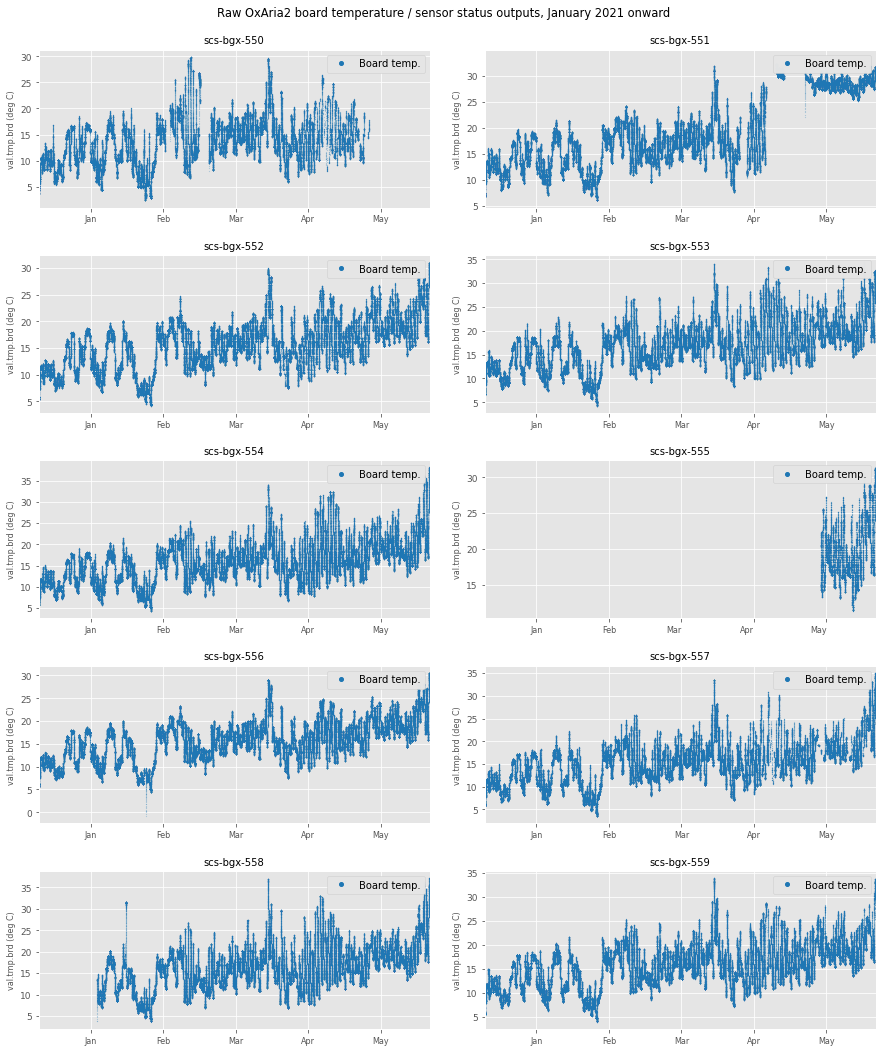

In [3]:
# Loop through plots with a log scale to compare time series & size fractions

plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria2 board temperature / sensor status outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria2_status.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    dat.plot(y='val.tmp.brd', c='tab:blue', linewidth=0.5, marker='o', ms=0.1, ls='', label='Board temp.', ax=ax, legend=True,
             zorder=1)
    ax.set_title(tag, fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('val.tmp.brd (deg C)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right')

plt.savefig(pngs+'oxaria2_bdrtmp_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()